In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.fft as fft
import pyaudio
import time
%matplotlib notebook

<IPython.core.display.Javascript object>


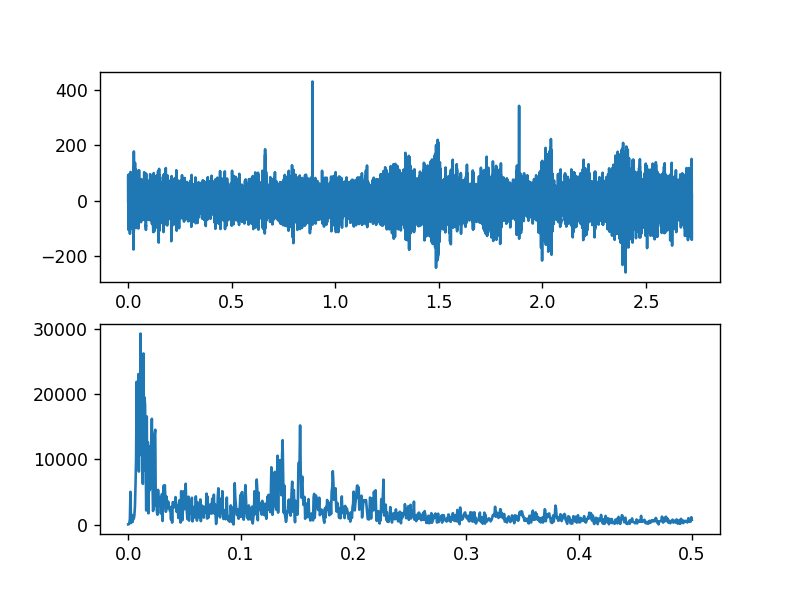

In [2]:
%matplotlib notebook
CHUNK = 4000 # number of data points to read at a time
RATE = 44100 # time resolution of the recording device (Hz)CHUNK = 500

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

xfp = (fft.fftfreq(CHUNK+1))[::2]
mask = (xfp>=0)
xf = xfp[mask]
yf = np.zeros(xf.size)

# some X and Y data
x = (np.arange(CHUNK*30)/RATE)[::-1]
y = np.zeros(x.size)

line1, = ax1.plot(x, y)
line2, = ax2.plot(xf, yf)

# draw and show it
fig.canvas.draw()
plt.show(block=False)

p=pyaudio.PyAudio() # start the PyAudio class
stream=p.open(format=pyaudio.paInt16,channels=1,rate=RATE,input=True,
              frames_per_buffer=CHUNK) #uses default input device

while True:
    try:
        yp = (np.fromstring(stream.read(CHUNK*2),dtype=np.int16))[::2]
        y[:-CHUNK] = y[CHUNK:]
        y[-CHUNK:] = yp
        
        yf = abs((fft.rfft(yp))[mask])

        # set the new data
        line1.set_ydata(y)
        line2.set_ydata(yf)
        
        ax1.relim() 
        ax1.autoscale_view(True,True,True)
        ax2.relim()
        ax2.autoscale_view(True, True, True)

        fig.canvas.draw()

#         time.sleep(0.1)
    except KeyboardInterrupt:
        break